In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_cleaned.csv')
target = pd.read_csv('train_target.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Drinks,4
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,Food,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Non-Consumables,26


In [4]:
df.columns = df.columns.str.lower() #for better use

In [5]:
# splitting the inital test set from the dataframe
test = df.loc[8523:]
test.reset_index(drop=True,inplace = True)

In [6]:
#splitting the initial train set from the dataframe 
train = df.loc[:8522]
train.reset_index(drop=True,inplace = True)

In [7]:
train = pd.concat([train,target],axis = 1)

In [8]:
train['item_fat_content'].unique()

array(['LOW FAT', 'REGULAR', 'Non-Edible'], dtype=object)

In [9]:
train['Item_Outlet_Sales'] = np.log(1+train['Item_Outlet_Sales'])

In [10]:
train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_item_type,outlet_years,Item_Outlet_Sales
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,8.225808
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Drinks,4,6.096776
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,7.648868
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,Food,15,6.597664
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Non-Consumables,26,6.903451


In [11]:
data = train.copy()

In [12]:
dff = train.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['outlet_identifier'])



label_col = ['outlet_size','item_fat_content','outlet_location_type','item_type','outlet_type']
for col in label_col:
    data[col] = le.fit_transform(data[col])

In [14]:
data.drop(columns = ['item_identifier','outlet_identifier','outlet_establishment_year','new_item_type'],inplace = True)

In [15]:
data.columns

Index(['item_weight', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_size', 'outlet_location_type', 'outlet_type',
       'outlet_years', 'Item_Outlet_Sales', 'Outlet'],
      dtype='object')

In [16]:
data

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,outlet_years,Item_Outlet_Sales,Outlet
0,9.300,0,0.016047,4,249.8092,1,0,1,14,8.225808,9
1,5.920,2,0.019278,14,48.2692,1,2,2,4,6.096776,3
2,17.500,0,0.016760,10,141.6180,1,0,1,14,7.648868,9
3,19.200,2,0.000000,6,182.0950,1,2,0,15,6.597664,0
4,8.930,1,0.000000,9,53.8614,0,2,1,26,6.903451,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,26,7.929984,1
8519,8.380,2,0.046982,0,108.1570,1,1,1,11,6.310436,7
8520,10.600,1,0.035186,8,85.1224,2,1,1,9,7.085159,6
8521,7.210,2,0.145221,13,103.1332,1,2,2,4,7.521100,3


In [17]:
Y = data.Item_Outlet_Sales.values
X = data.drop('Item_Outlet_Sales',axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

dt_reg = DecisionTreeRegressor(random_state = 0)
neigh = KNeighborsRegressor(n_neighbors=2)
lin_reg = LinearRegression()
rid_reg = Ridge()
svm_reg = SVR()
rf_reg = RandomForestRegressor(max_depth = 3)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#for lasso regression with different cvs
alphas = [0.1,0.001,0.005,0.008,0.0005,0.006,0.008,0.0001]
error = []
alpha = []
for i in range(1,10):
    alpha.append(i/1000)
    las_reg = Lasso(alpha = i/1000)
    error.append(np.mean(cross_val_score(las_reg,X_train,Y_train,cv = 5,scoring = 'neg_mean_absolute_error')))

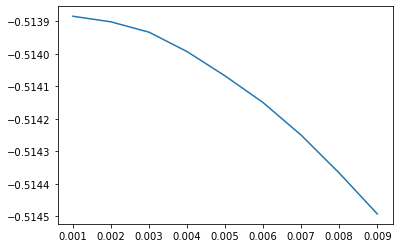

In [20]:
plt.plot(alpha,error)

In [21]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.001,-0.513885


In [22]:
new_las_reg = Lasso(alpha = 0.004)
las_cv_score = cross_val_score(new_las_reg,X_train,Y_train,cv = 5)
np.mean(las_cv_score)

0.5934778230441238

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
def train_df(models_list,x_train,x_test,y_train,y_test):
    models = []
    cv_scores = []
    mses = []
    R2_score = []
    for model in models_list:
        models.append(model)
        #training the model
        model.fit(x_train,y_train)
        cv_score = cross_val_score(model, x_train,y_train,cv=5)
        cv_score = np.mean(cv_score)
        cv_scores.append(cv_score)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test,y_pred)
        mses.append(mse)
        score = r2_score(y_test,y_pred)
        R2_score.append(score)
    return models,cv_scores,mses,R2_score


In [25]:
input_list = [lin_reg,new_las_reg,rid_reg,svm_reg,dt_reg,neigh]

In [28]:
models,cv_scores,mses,R2_score = train_df(input_list,X_train,X_test,Y_train,Y_test)
train_df(input_list,X_train,X_test,Y_train,Y_test)

([LinearRegression(),
  Lasso(alpha=0.004),
  Ridge(),
  SVR(),
  DecisionTreeRegressor(random_state=0),
  KNeighborsRegressor(n_neighbors=2)],
 [0.5935568373639856,
  0.5934778230441238,
  0.5935572056053051,
  0.7222923741687944,
  0.446016687125672,
  0.5842054152151769],
 [0.42193230613640387,
  0.4218193861244658,
  0.4219287323922452,
  0.27908023970943147,
  0.5443678125880861,
  0.41285575498343347],
 [0.5846146074459644,
  0.5847257753342818,
  0.5846181257381138,
  0.7252501094611618,
  0.46407887180702845,
  0.593550322272443])

In [29]:
pd.DataFrame({'Model': models,'CV_Score' : cv_scores,'MSE' : mses,'R2_Score' : R2_score})

,Model,CV_Score,MSE,R2_Score
0,LinearRegression(),0.593557,0.421932,0.584615
1,Lasso(alpha=0.004),0.593478,0.421819,0.584726
2,Ridge(),0.593557,0.421929,0.584618
3,SVR(),0.722292,0.279080,0.725250
4,DecisionTreeRegressor(random_state=0),0.446017,0.544368,0.464079
5,KNeighborsRegressor(n_neighbors=2),0.584205,0.412856,0.593550


In [ ]:
def mono_train(model,x_train,x_test,y_train,y_test):
    #training the model
    model.fit(x_train,y_train)
    cv_score = cross_val_score(model, x_train,y_train,cv=5)
    cv_score = np.mean(cv_score)
    print('cv_Score',cv_score)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    print('mse',mse)
    score = r2_score(Y_test,y_pred)
    print('r2_score',score)

In [ ]:
data.head()

In [ ]:
svm_reg.predict([X_test[1,:]])

In [ ]:
np.exp(8.25595716) -1

In [ ]:
Y_test[1]

In [ ]:
X.columns

In [ ]:
X['outlet_type'].unique()

In [ ]:
train['outlet_size'].unique()

In [ ]:
pd.set_option('display.max_colwidth', None)
X

In [ ]:
X['Outlet'].unique()

In [ ]:
df['outlet_identifier'].unique()

In [ ]:
X.columns

In [30]:
data.columns

Index(['item_weight', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_size', 'outlet_location_type', 'outlet_type',
       'outlet_years', 'Item_Outlet_Sales', 'Outlet'],
      dtype='object')

In [32]:
data['item_fat_content'].unique()

array([0, 2, 1])

In [34]:
train['item_fat_content'].unique()

array(['LOW FAT', 'REGULAR', 'Non-Edible'], dtype=object)

In [35]:
data['item_type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [36]:
train['item_type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [38]:
data['outlet_location_type'].unique()

array([0, 2, 1])

In [39]:
train['outlet_location_type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [48]:
data['Outlet'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [51]:
train['outlet_identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [44]:
X

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,outlet_years,Outlet
0,9.300,0,0.016047,4,249.8092,1,0,1,14,9
1,5.920,2,0.019278,14,48.2692,1,2,2,4,3
2,17.500,0,0.016760,10,141.6180,1,0,1,14,9
3,19.200,2,0.000000,6,182.0950,1,2,0,15,0
4,8.930,1,0.000000,9,53.8614,0,2,1,26,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,26,1
8519,8.380,2,0.046982,0,108.1570,1,1,1,11,7
8520,10.600,1,0.035186,8,85.1224,2,1,1,9,6
8521,7.210,2,0.145221,13,103.1332,1,2,2,4,3
